## Figures BglB thermal stability paper 

### Contents

Summary statistics and those that don't fit neatly into categories below: 

+ unique positions list 
+ PyMOL commands for making a figure showing all the positions mutated 
+ list of mutants that don't express 

Conservation: 

+ percent conservation for each residue from alignment of BglB to Pfam GH1 (1,554 sequences)
+ plot of conservation across BglB sequence 
+ sequence logo 

Visualization of expression, Tm, kcat, KM, and kcat/KM for all 128 mutants 

+ diverging color heat map 
+ compact, minimalistic bar plots 

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt 
import pandas
from numpy import log10, log2, inf, nan, arange, linspace 

In [6]:
df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )

### Summary statistics and those that don't fit neatly into categories below

Number of sequence positions mutated:

In [7]:
len( df.sequence_pos.unique() ) 

68

How could you quickly select them in PyMOL? You could use: 

In [8]:
s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print 'select all_mutants, resi', s

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


List of mutants that do not express:

In [9]:
df[( df.expression == 0 )].index

Index([u'G12N', u'S16N', u'Q19P', u'S32L', u'W34A', u'F72H', u'R76A', u'H119E',
       u'W120A', u'D121F', u'N163K', u'N163E', u'E164G', u'E164R', u'H178R',
       u'A236E', u'R240E', u'A249E', u'M261D', u'N293D', u'N293K', u'Y294L',
       u'T296E', u'H315N', u'M323K', u'W325G', u'P329N', u'F343S', u'G355A',
       u'H379T', u'D403A', u'W407Y', u'W407A', u'W407Q', u'W407R', u'W407G',
       u'W407K'],
      dtype='object', name=u'mutant')

### Correlation 

### Conservation along BglB sequence 

Alignment of 1554 Pfam sequences that we trimmed by hand to have catalytic residues as in previous paper 



In [10]:
dat = pandas.read_csv( 'alignment/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
print len( dat ) 

445


In [11]:
aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

In [12]:
clean_dat = dat[ aas ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 
clean_dat[ 'entropy' ] = dat.Entropy

In [13]:
print len( clean_dat ) 
clean_dat.sample( 5 ) 

445


,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,percents,sequence_pos,entropy
amino_acid,,,,,,,,,,,,,,,,,,,,,
r,90,10,6,9,0,76,0,5,4,0,...,3,261,597,265,8,0,0,0.165399,297,NaN
e,136,3,799,319,2,13,14,5,40,18,...,70,33,22,5,2,0,8,0.203314,389,NaN
a,555,13,23,131,0,8,2,1,1,8,...,53,1,691,1,1,0,1,0.351044,80,NaN
s,93,14,21,42,83,50,58,49,44,82,...,56,187,158,128,66,6,78,0.110644,298,NaN
g,22,2,17,20,11,286,3,4,14,17,...,7,10,8,9,14,0,8,0.608511,365,NaN


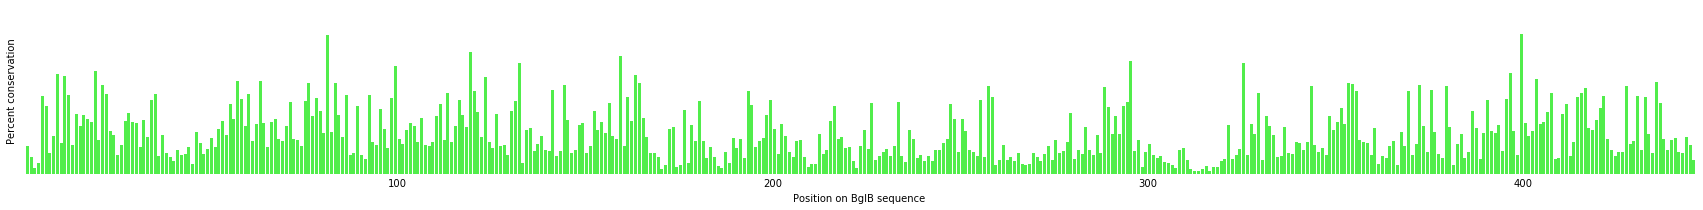

In [14]:
plt.figure( figsize=( 30, 3 ) ) 
#plt.scatter( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) ,color='k', label='Entropy (normalized to 1)', marker='.' )
plt.bar( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) , lw=0, color=(0.03,.9,0,0.7), label='Entropy' )
#plt.bar( clean_dat.sequence_pos, clean_dat.percents, lw=0, color=(0,0,1,0.1), label='Percent conserved' ) 
#plt.plot( clean_dat.sequence_pos, clean_dat.percents, color='g', label='Percent conserved' ) 

plt.xlim( 0, 446 ) 
plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
#plt.xticks( [] ) 
plt.ylabel( 'Percent conservation' )
plt.xlabel( 'Position on BglB sequence' ) 
plt.tick_params( length=0 ) 
plt.yticks( [] ) 
#plt.legend()
plt.box(0)
plt.show()

In [15]:
my_percent_conserved = clean_dat[ [ 'sequence_pos', 'percents' ] ]
my_percent_conserved.index = my_percent_conserved.sequence_pos
my_dict = dict( my_percent_conserved.percents ) 

### Depiction of expression, Tm, kcat, KM, and kcat/KM for 128 mutants 

Heat map style uses a diverging (red/blue) color map to compare the log values relative to wild type

In [16]:
# heat map 

h_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'sequence_pos' ] 
h = df[ h_cols ].copy()

h.tm = h.tm - 39.93 
h.kcat = log10( h.kcat / 880 ) 
h.km = log10( (1/h.km) / (1/5.) )
h.kcatkm = log10( h.kcatkm / 174000 )  
h.expression = h.expression # boolean 
h['percent_conserved'] = h.sequence_pos.map( my_dict )
#h.replace( [ -inf ], -5, inplace=True ) # damn son
h = h.sort_values( by='sequence_pos' )

# sanity check: what are the WT values after this procedure?  
print h.loc[ 'BglB' ] 

expression           1.0
tm                   0.0
kcat                 0.0
km                   0.0
kcatkm               0.0
sequence_pos         NaN
percent_conserved    NaN
Name: BglB, dtype: float64


In [17]:
print h.describe()

       expression         tm       kcat         km     kcatkm  sequence_pos  \
count  129.000000  69.000000  80.000000  80.000000  92.000000    128.000000   
mean     0.713178  -0.590725  -0.836934  -0.172412  -1.449682    241.531250   
std      0.454041   1.618392   0.948346   0.391784   1.515885    122.181737   
min      0.000000  -5.680000  -2.944483  -1.251297  -4.240549     12.000000   
25%      0.000000        NaN        NaN        NaN        NaN           NaN   
50%      1.000000        NaN        NaN        NaN        NaN           NaN   
75%      1.000000        NaN        NaN        NaN        NaN           NaN   
max      1.000000   2.720000   1.097344   1.096910   0.955350    423.000000   

       percent_conserved  
count         128.000000  
mean            0.499220  
std             0.355953  
min             0.001263  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max             1.000000  


/usr/local/bin/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [18]:
colors = [
    [ ( 0, 0, 0, x.round(2) ) for x in h[ 'percent_conserved' ] ], 
    [ ( 0, 0, 0, x ) for x in h[ 'expression' ] ], 
]
    
colors = pandas.DataFrame( colors ).T

colors

,0,1
0,"(0, 0, 0, 0.96)","(0, 0, 0, 0)"
1,"(0, 0, 0, 0.16)","(0, 0, 0, 1)"
2,"(0, 0, 0, 0.62)","(0, 0, 0, 1)"
3,"(0, 0, 0, 0.4)","(0, 0, 0, 1)"
4,"(0, 0, 0, 0.4)","(0, 0, 0, 0)"
5,"(0, 0, 0, 0.2)","(0, 0, 0, 1)"
6,"(0, 0, 0, 0.2)","(0, 0, 0, 1)"
7,"(0, 0, 0, 0.46)","(0, 0, 0, 1)"
8,"(0, 0, 0, 0.99)","(0, 0, 0, 1)"
9,"(0, 0, 0, 0.99)","(0, 0, 0, 0)"


In [49]:
h.corr()

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
expression,1.000000,NaN,NaN,NaN,0.194055,0.015245,-0.250323
tm,NaN,1.000000,-0.037909,-0.143028,-0.024171,0.154691,0.239670
kcat,NaN,-0.037909,1.000000,0.154804,0.941022,-0.322746,-0.693856
km,NaN,-0.143028,0.154804,1.000000,0.437564,0.077674,-0.154620
kcatkm,0.194055,-0.024171,0.941022,0.437564,1.000000,-0.158393,-0.694454
sequence_pos,0.015245,0.154691,-0.322746,0.077674,-0.158393,1.000000,0.024341
percent_conserved,-0.250323,0.239670,-0.693856,-0.154620,-0.694454,0.024341,1.000000


### Color maps 

We need color maps for 

|parameter|type|range|colors|n_bins|bins|
---|---
|protein expression|binary|[0,1]|white-black|2|[0],[1]|
|tm|float|[-6,4]|purple green yellow|5|[-1,1], [1-3], [>3], [-3,-1], [<-3]|
|kcat, km, kcat/km|[-5,2]|navy gray gold|?|[-1,1], [-3,-1], [>-3], [1,3], 


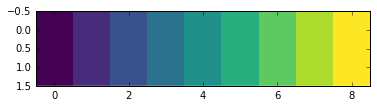

In [20]:
import numpy as np 
damn_son = np.array( [ arange( -5, 4, 1 ), arange( -5, 4, 1 ), ] )
plt.imshow( damn_son, cmap='viridis', interpolation='none' )

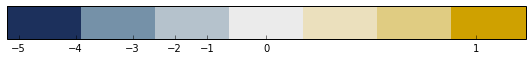

In [21]:
# color map 

from matplotlib import pyplot
import matplotlib as mpl

fig = pyplot.figure(figsize=(8, 3))
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

cmap = mpl.colors.ListedColormap([
    ( .11, .19, .36 ), # deep blue
    ( .46, .57, .66 ), # medium blue
    ( .71, .76, .80 ), # light blue 
    ( .92, .92, .92 ), # grey 
    ( .92, .88, .74 ), # light yellow
    ( .88, .80, .51 ), # medium yellow 
    ( .81, .63, 0. ),  # deep yellow 
#     ( .81, .63, 0. ),  # deep yellow 
#     ( .81, .63, 0. ),  # deep yellow 
#     ( .81, .63, 0. ),  # deep yellow 
])

cmap.set_over((1., 0., 0.))
cmap.set_under(( .11, .19, .36 ))

#bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2 ]
bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2, ] #2.6, 3.9, 5.2 ]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, ticks=[-5, -4, -2, -3, -1, 0, 1], orientation='horizontal')
pyplot.show()

In [22]:
h.describe()

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
count,129.000000,69.000000,80.000000,80.000000,92.000000,128.000000,128.000000
mean,0.713178,-0.590725,-0.836934,-0.172412,-1.449682,241.531250,0.499220
std,0.454041,1.618392,0.948346,0.391784,1.515885,122.181737,0.355953
min,0.000000,-5.680000,-2.944483,-1.251297,-4.240549,12.000000,0.001263
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,2.720000,1.097344,1.096910,0.955350,423.000000,1.000000


In [23]:
my_params = { 
    'tm': {
        'cmap': 'viridis', 'vmin': -4, 'vmax': 4 , 
    }, 
    'expression': {
        'cmap': 'Greys', 'vmin': -0.2, 'vmax': 1.2 , 
    }, 
    'kcat': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'km': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'kcatkm': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'percent_conserved': {
        'cmap': 'Greys', 'vmin': 0, 'vmax': 1, 
    }, 
}

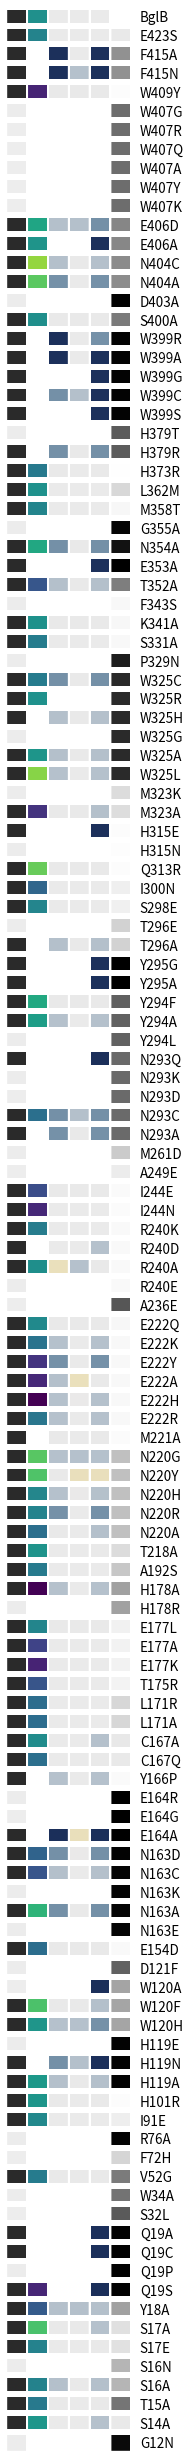

In [24]:
to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved' ] )

plt.figure( figsize=(20,90) ) 
plt.subplots_adjust( left=1., right=1.1 )

for i, col in to_plot:
    plt.subplot( 1, 7, i+1 ) 
    plt.imshow( h[ [ col ] ], interpolation='none', origin=0, **my_params[ col ] )
    plt.xticks([]); plt.yticks([]) 
    plt.box( 0 ) 

    for i, r in enumerate( h.index ):
        plt.plot( [ -.5, .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) 
        
# mutant labels         
font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
for i, r in enumerate( h.index ):
    plt.text( 1, i-0.3, r, fontdict=font )

plt.subplots_adjust(wspace=0.1, hspace=0)

#plt.show()
#plt.savefig( 'heatmap_out.png', dpi=200 ) 

In [25]:
print df.columns

Index([u'sequence_pos', u'expression', u'tm', u'why_no_tm', u'kcat', u'km',
       u'kcatkm', u'ki', u'eki', u'percent_err_kcat', u'err_kcat',
       u'percent_err_km', u'err_km', u'err_kcatkm', u'in_plos_paper',
       u'gel_number', u'k', u'err_tm', u'err_k', u'Siena gel levels',
       u'Alex gel levels'],
      dtype='object')


In [26]:
def make_colorbar( mutant_name, expression, tm, kcat, km, kcatkm, conservation ):
    
    # meeeeetadeta 
    mutant_name = mutant_name
    
    # expression 
    expression = ( 0, 0, 0, expression )
    
    # tm
    wt_tm = 39.93
    if abs( wt_tm - tm ) < 1:
        tm = ( 0, 0, 0, .5 ) # gray 
    elif tm - wt_tm > 0:
        tm = ( 1, 0, 0, 1 ) # red 
    elif tm - wt_tm < 0:
        tm = ( 0, 0, 1, 1 ) # blue 
    else: # there is no value 
        tm = ( 1, 1, 1, 0 ) # green, warning!    
        
    kcat = km = kcatkm = conservation = ( 1, 1, 1, 1 )
    
    my_vals = (
        #mutant_name, 
        expression, 
        tm, 
        kcat, 
        km, 
        kcatkm, 
        conservation, 
    )
    
    return my_vals #' '.join( [ str( i ) for i in my_vals ] )


my_cols = [ 'Protein expression ()', 'Tm', 'kcat', 'km', 'kcat/km', 'c' ]
my_new_df = pandas.DataFrame( columns=my_cols )

for index, data in h.iterrows():    
    my_new_df.loc[ index ] = make_colorbar( index, data.expression, data.tm, data.kcat, data.km, data.kcatkm, data.percent_conserved )


In [27]:
my_new_df.as_matrix()

array([[(0, 0, 0, 0.0), (1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 1.0), (0, 0, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 1.0), (0, 0, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 1.0), (0, 0, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 0.0), (1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 1.0), (0, 0, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 1.0), (0, 0, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 1.0), (0, 0, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 1.0), (0, 0, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1),
        (1, 1, 1, 1), (1, 1, 1, 1)],
       [(0, 0, 0, 0.0), (1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 1, 1),
       

In [29]:
#plt.imshow( my_new_df.as_matrix() )

### Bar plot style 

using minimalistic bar plots, with a thick band indicating a 2-fold spread around native values. 

In [30]:
# bar plot style 

b_cols = [ 'kcat', 'err_kcat', 'km', 'err_km', 'kcatkm', 'err_kcatkm' ] 
j = df[ b_cols ].copy()
j = log10( j ) + 1 

In [31]:
j.loc['BglB']

kcat          3.944483
err_kcat      2.000000
km            1.698970
err_km        0.301030
kcatkm        6.240549
err_kcatkm    4.903090
Name: BglB, dtype: float64

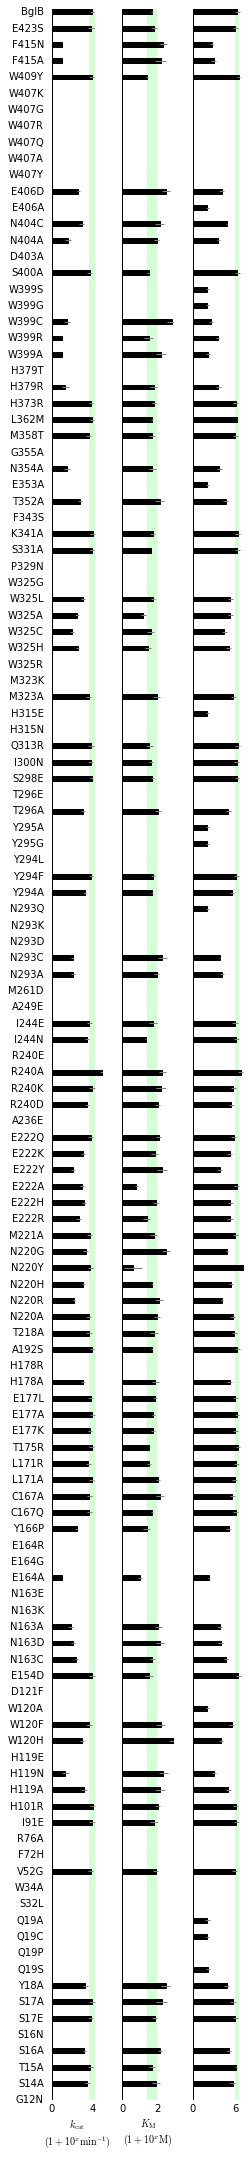

In [32]:
#http://faculty.washington.edu/stuve/log_error.pdf
#describes how to log error bars 

plt.figure( figsize=(5,30) ) 

bar_cols = [ 
    ( 'kcat', 'err_kcat', u'$k_{\mathrm{cat}}$\n$( 1 + 10^x \mathrm{min}^{-1})$' ), 
    ( 'km', 'err_km', u'$K_{\mathrm{M}}$\n$( 1 + 10^x \mathrm{M} )$' ), 
    ( 'kcatkm', 'err_kcatkm', '' ), 
]

for i, ( col, err, fmt_str ) in enumerate( bar_cols ):
    plt.subplot( 1, 5, i+1 )
    x_vals = [ i for i in range( len( j ) ) ]
    plt.barh( x_vals, j[col], color='k', height=0.3, edgecolor=None, 
        xerr=0.434*j[err]/j[col],
        ecolor='gray', capsize=0, align='center' )
    plt.tick_params( length=0 ) 
    plt.yticks([])

    my_val = j.loc['BglB'][ col ]              
    plt.fill_between( [my_val - 0.3, my_val + 0.3], 128.2, color=(0,1,0,0.17), linewidth=0 ) 
    
    plt.xticks( [ 0, my_val.round() ] )
    plt.box( 0 ) 
    
    plt.plot( ( 0, 0 ), ( 0, 128.2 ), color='k' ) 
    plt.xlabel( fmt_str )  

for i, r in enumerate( j.index ):
    font = { 'horizontalalignment': 'right' }
    plt.text( -21, i-.2, r, fontdict=font )

plt.subplots_adjust( wspace=0 )
plt.tight_layout()
#plt.savefig( 'bar_plot_out.png', dpi=600 ) 

In [33]:
# kinetic constants versus tm 

In [43]:
from scipy.stats import pearsonr 

mutant
G12N          NaN
S14A     2.505150
T15A     2.788168
S16A     2.187521
S16N          NaN
S17E     2.806858
S17A     2.928396
Y18A     2.294466
Q19S          NaN
Q19P          NaN
Q19C          NaN
Q19A          NaN
S32L          NaN
W34A          NaN
V52G     2.836957
F72H          NaN
R76A          NaN
I91E     2.927370
H101R    3.024896
H119A    2.155336
H119N    0.301030
H119E         NaN
W120H    1.924279
W120F    2.673942
W120A         NaN
D121F         NaN
E154D    2.943495
N163C    1.414973
N163D    1.079181
N163A    0.845098
           ...   
E353A         NaN
N354A    0.477121
G355A         NaN
M358T    2.639486
L362M    2.962369
H373R    2.849419
H379R    0.301030
H379T         NaN
W399A    0.000000
W399R    0.000000
W399C    0.477121
W399G         NaN
W399S         NaN
S400A    2.725095
D403A         NaN
N404A    0.602060
N404C    1.930440
E406A         NaN
E406D    1.591065
W407Y         NaN
W407A         NaN
W407Q         NaN
W407R         NaN
W407G         NaN
W40

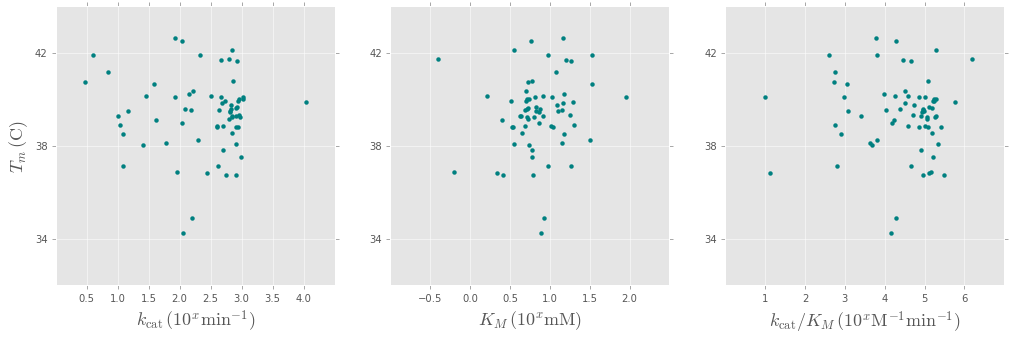

In [48]:
plt.style.use( 'ggplot' )

constants = [ 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$' ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$' ),
    ( 'kcatkm', 17400, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$' ),
] 

plt.figure( figsize=( 17, 5 ) ) 

for idx, ( constant, native_value, fmt_str ) in enumerate( constants ):
    
    x = log10( df[ constant ] ) 
    y = df.tm
    my_log_value = log10( native_value ) 
    
    print x, y
    
    plt.subplot( 1, 3, idx+1 ) 
    plt.scatter( x, y, color='teal', lw=0 ) 
    
    my_x_ticks = plt.xticks()[0]
    plt.xticks( my_x_ticks[1:-1] )
    plt.yticks( [ 34, 38, 42 ] )

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( '$T_m\,(\mathrm{C})$', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [35]:
my_muts = [ 'E222H', 'Q19S', 'N404C', 'W120F' ] 

In [36]:
# data for panel figure 

df[ 'delta_tm' ] = df[ 'tm' ] - 39.9 
print df.loc[ my_muts ].sort_values( 'tm' )  

        sequence_pos  expression     tm why_no_tm   kcat     km   kcatkm  ki  \
mutant                                                                         
E222H          222.0           1  34.91       NaN  160.0   8.54  18695.0 NaN   
Q19S            19.0           1  36.82       NaN    NaN    NaN     13.0 NaN   
W120F          120.0           1  41.68       NaN  472.0  16.08  29334.0 NaN   
N404C          404.0           1  42.65       NaN   85.2  14.40   5917.0 NaN   

        eki  percent_err_kcat   ...     err_km  err_kcatkm  in_plos_paper  \
mutant                          ...                                         
E222H   NaN               1.9   ...       0.53      1212.0              1   
Q19S    NaN               NaN   ...        NaN         3.0              1   
W120F   NaN               4.4   ...       2.07      3980.0              1   
N404C   NaN               4.3   ...       1.90         1.0              0   

        gel_number     k  err_tm  err_k  Siena gel level

In [37]:
# individual Tm plots for selected mutants 

assay_data = pandas.read_csv( '../data_sets/experimental_data/assay_data/corrected_assay_data.csv', index_col=0 )
assay_data.sample( 5 ) 

,well,rate,mutant_old,temp
mutant,,,,
H101R,G5,0.538000,H101R,32.90
S17A,D6,0.104000,S17A,41.45
G355A,G10,-0.000087,G355A,32.90
T15A,C4,0.000340,T15A,44.30
F72H,H4,0.015700,F72H,30.05


In [38]:
df.loc[ 'BglB' ] 

sequence_pos           NaN
expression               1
tm                   39.93
why_no_tm              NaN
kcat                   880
km                       5
kcatkm              174000
ki                     NaN
eki                    NaN
percent_err_kcat       1.1
err_kcat                10
percent_err_km           4
err_km                 0.2
err_kcatkm            8000
in_plos_paper            1
gel_number             NaN
k                    -1.19
err_tm                0.09
err_k                 0.08
Siena gel levels         1
Alex gel levels        NaN
delta_tm              0.03
Name: BglB, dtype: object

In [39]:
plt.plot?

In [40]:
# define logistic equation 
def f(x, x0, k): 
    return 1/(1+np.exp(-k*(x-x0)))

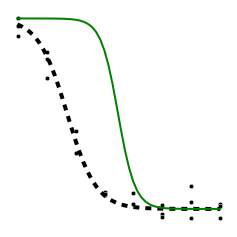

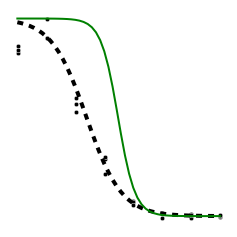

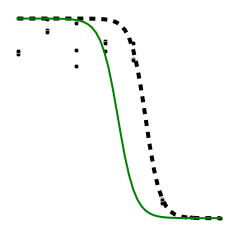

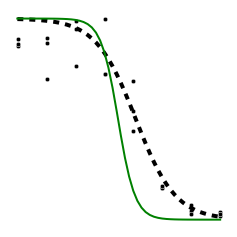

In [41]:
for my_mut in my_muts:
    plt.figure( figsize=( 4, 4 ) ) 
    
    # assay data 
    my_data = assay_data.loc[ my_mut ].copy()
    my_data[ 'rate' ] = my_data[ 'rate' ] / my_data['rate'].max()   
    plt.box( 0 ) 
    plt.xticks( [] )
    plt.yticks( [] )
    plt.scatter( my_data.temp, my_data.rate, c='k' )
    
    # fit and WT values 
    my_params = df.loc[ my_mut ][ [ 'tm', 'k' ] ]  
    x_vals = np.linspace( 30, 50, 50 ) 
    plt.plot( x_vals, f( x_vals, * my_params ), 'k--', lw=4 )
    plt.plot( x_vals, f( x_vals, 39.93, -1.19 ), c='g', lw=2 )

In [42]:
# single feature correlations

In [ ]:
# machine learning results 